## Q4

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

import torch
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from Utils import *
from Templates import *
from torch.utils.data import Dataset, DataLoader

In [2]:
trainset = DataAugment3('./dataset/',train= True)
train_loader = DataLoader(trainset, batch_size = 2, shuffle = True)

testset = DataAugment3('./dataset/',train= False)
test_loader = DataLoader(testset, batch_size = 15, shuffle = True)

In [4]:
epochs = 10
lr = 1e-4
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
log_interval = 1
trained = True
path = './Models/'
save = False

net = Model(out_ch = 11).to(device)
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = lr) 

train_losses = []
train_loss = 0

if trained:
    d = torch.load(path+'q4.pth',map_location=torch.device('cpu'))
    train_losses = d['train_losses']
    net.load_state_dict(d['state_dict'])

In [31]:
for e in range(epochs):
    net.train()
    for idx, data in enumerate(train_loader):
        inpt = data['x'].to(device)
        seg_mask = data['seg_mask'].to(device)

        optimizer.zero_grad()
        output = net(inpt)      
        
        loss =  criterion(output,seg_mask)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        
        if idx %log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                e, idx, len(train_loader),
                100. * idx / len(train_loader), loss.item()))
            d = {'state_dict':net.state_dict(), 'train_losses': train_losses}
            torch.save(d,path + 'q4.pth')
            print("Model Saved Epoch: {},Idx:{}".format(e,idx))
        
    train_loss /= len(train_loader.dataset)
    train_loss.append(train_loss)

Train Epoch: 0 [0/15000 (0%)]	Loss: 2.401297
Model Saved Epoch: 0,Idx:0
Train Epoch: 0 [1/15000 (0%)]	Loss: 2.400144
Model Saved Epoch: 0,Idx:1
Train Epoch: 0 [2/15000 (0%)]	Loss: 2.399423
Model Saved Epoch: 0,Idx:2
Train Epoch: 0 [3/15000 (0%)]	Loss: 2.398622
Model Saved Epoch: 0,Idx:3
Train Epoch: 0 [4/15000 (0%)]	Loss: 2.398483
Model Saved Epoch: 0,Idx:4
Train Epoch: 0 [5/15000 (0%)]	Loss: 2.397922
Model Saved Epoch: 0,Idx:5
Train Epoch: 0 [6/15000 (0%)]	Loss: 2.396890
Model Saved Epoch: 0,Idx:6
Train Epoch: 0 [7/15000 (0%)]	Loss: 2.396197
Model Saved Epoch: 0,Idx:7
Train Epoch: 0 [8/15000 (0%)]	Loss: 2.395944
Model Saved Epoch: 0,Idx:8
Train Epoch: 0 [9/15000 (0%)]	Loss: 2.394983
Model Saved Epoch: 0,Idx:9
Train Epoch: 0 [10/15000 (0%)]	Loss: 2.393744
Model Saved Epoch: 0,Idx:10
Train Epoch: 0 [11/15000 (0%)]	Loss: 2.392282
Model Saved Epoch: 0,Idx:11
Train Epoch: 0 [12/15000 (0%)]	Loss: 2.390635
Model Saved Epoch: 0,Idx:12
Train Epoch: 0 [13/15000 (0%)]	Loss: 2.388407
Model Saved 

Train Epoch: 0 [111/15000 (1%)]	Loss: 1.680919
Model Saved Epoch: 0,Idx:111
Train Epoch: 0 [112/15000 (1%)]	Loss: 1.692558
Model Saved Epoch: 0,Idx:112
Train Epoch: 0 [113/15000 (1%)]	Loss: 1.705958
Model Saved Epoch: 0,Idx:113
Train Epoch: 0 [114/15000 (1%)]	Loss: 1.681161
Model Saved Epoch: 0,Idx:114
Train Epoch: 0 [115/15000 (1%)]	Loss: 1.710094
Model Saved Epoch: 0,Idx:115
Train Epoch: 0 [116/15000 (1%)]	Loss: 1.671594
Model Saved Epoch: 0,Idx:116
Train Epoch: 0 [117/15000 (1%)]	Loss: 1.679245
Model Saved Epoch: 0,Idx:117
Train Epoch: 0 [118/15000 (1%)]	Loss: 1.688179
Model Saved Epoch: 0,Idx:118
Train Epoch: 0 [119/15000 (1%)]	Loss: 1.676295
Model Saved Epoch: 0,Idx:119
Train Epoch: 0 [120/15000 (1%)]	Loss: 1.676447
Model Saved Epoch: 0,Idx:120
Train Epoch: 0 [121/15000 (1%)]	Loss: 1.686665
Model Saved Epoch: 0,Idx:121
Train Epoch: 0 [122/15000 (1%)]	Loss: 1.682667
Model Saved Epoch: 0,Idx:122
Train Epoch: 0 [123/15000 (1%)]	Loss: 1.686334
Model Saved Epoch: 0,Idx:123
Train Epoch:

KeyboardInterrupt: 

In [5]:
# idx, data = next(enumerate(test_loader))
# output = torch.exp(net(data['x'].to(device)))
# plt.subplot(1,2,1)
# plt.imshow(output.detach().argmax(dim=1).numpy()[0])


JSim3(net,test_loader,device)

/home/sirius/Desktop/Quick Access/Signals/CV/Assignment_3/Utils.py:21: RuntimeWarning: invalid value encountered in double_scalars
  s2_mean = np.array([ii*hist[ii]/w2 for ii in range(i,256)]).sum()


0/667


/home/sirius/.local/lib/python3.8/site-packages/torch/nn/functional.py:3060: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "


1/667
2/667
3/667
4/667
5/667
6/667
7/667
8/667
9/667
10/667


(0.7726016793795142, 127.47927709761983)

In [2]:
with torch.no_grad():
    idx, data = next(enumerate(test_loader))
    output = torch.exp(net(data['x'].to(device)).cpu())
    predicted = output.detach().argmax(dim = 1).numpy()
    labels = data['seg_mask']

NameError: name 'torch' is not defined

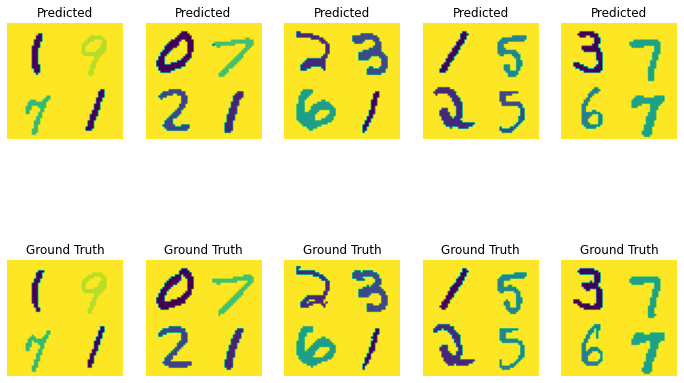

In [49]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams["figure.edgecolor"] = 'black'
plt.rcParams['axes.edgecolor'] = 'white'
for j in range(5):
    plt.subplot(2,5,j+1)
    plt.axis('off')
    plt.title("Predicted")
    plt.imshow(predicted[j])

    plt.subplot(2,5,6+ j)
    plt.axis('off')
    plt.title("Ground Truth")
    plt.imshow(labels[j])

In [3]:
len(test_loader.dataset)

10000